In [1]:
# Add ../ to path
import sys
sys.path.append('../')
from machinelearning.mlpipeline import MLPipelines
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import optuna

%load_ext autoreload
%autoreload 2

csv_dir = "../data/composite_dataset.csv"
label = "group"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
mlpipe.normalize()

Label mapping: {'Factor1:CASE': 0, 'Factor1:CONTROL': 1}
You have not provided an estimator.


In [2]:
model = SVC()
mlpipe.estimator = model
mlpipe.bayesian_search()

For the SVC model: 
Best parameters: {'C': 0.054765412967875765, 'gamma': 0.07327689604866867, 'kernel': 'linear', 'probability': False, 'shrinking': True, 'decision_function_shape': 'ovr'}
Best matthews_corrcoef: 0.44542008737551475


In [3]:

param_grid = {'C': [0.001, 0.01, 0.1]}
mlpipe.estimator = model
mlpipe.best_estimator = model
mlpipe.param_grid = param_grid

scores = mlpipe.model_evaluation()

Evaluating model SVC...
Average matthews_corrcoef: -0.028385104073801914
Standard deviation matthews_corrcoef: 0.2816364666105336


  0%|          | 0/2 [00:00<?, ?it/s]

Performing nested cross-validation for GradientBoostingClassifier...
Performing nested cross-validation for GradientBoostingClassifier...


[I 2024-02-02 16:33:09,589] A new study created in memory with name: no-name-787811a0-ee3f-401a-987e-116fe17a7959
[I 2024-02-02 16:33:09,592] A new study created in memory with name: no-name-44fd7d26-41e7-4e85-ab70-2d124568942c
[I 2024-02-02 16:33:09,622] A new study created in memory with name: no-name-e0c36615-2879-4116-ae74-1cf496d8a604
[I 2024-02-02 16:33:09,634] A new study created in memory with name: no-name-085934e2-8de6-4f1e-a749-50470b3e85e0
[I 2024-02-02 16:33:09,658] A new study created in memory with name: no-name-7e42bad6-a31e-4c5d-957c-62d9a17a306b
[I 2024-02-02 16:33:10,373] Trial 0 finished with value: 0.3204283558837384 and parameters: {'loss': 'log_loss', 'learning_rate': 0.38811960390049144, 'n_estimators': 8, 'criterion': 'squared_error', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.3204283558837384.
[I 2024-02-02 16:33:10,680] Trial 1 finished with value: 0.44745772276307466 and parameters: {'loss': 'log_loss', 'lea

Performing nested cross-validation for LinearDiscriminantAnalysis...
Performing nested cross-validation for LinearDiscriminantAnalysis...


[I 2024-02-02 16:33:29,718] A new study created in memory with name: no-name-2c088fae-2ffe-4a9f-99ea-e73aa55ac2af
[I 2024-02-02 16:33:29,720] A new study created in memory with name: no-name-e7b31f83-98b4-4944-9616-2c46e0d1781b
[I 2024-02-02 16:33:29,733] A new study created in memory with name: no-name-84632d5f-b83b-4f9a-9c47-746a782d43ed
[I 2024-02-02 16:33:29,738] A new study created in memory with name: no-name-b89171e1-48f4-4f7a-b0c4-c9303b4fee57
[I 2024-02-02 16:33:29,740] A new study created in memory with name: no-name-582b46ed-26aa-401e-886b-7ddef04d1ade
[I 2024-02-02 16:33:42,295] Trial 1 finished with value: 0.047687786182801874 and parameters: {'solver': 'eigen', 'shrinkage': 0.9687568964006936, 'tol': 0.0001, 'store_covariance': True}. Best is trial 1 with value: 0.047687786182801874.
[I 2024-02-02 16:33:42,331] Trial 0 finished with value: 0.08254363519167764 and parameters: {'solver': 'eigen', 'shrinkage': 0.12588768505310355, 'tol': 0.0001, 'store_covariance': False}. B

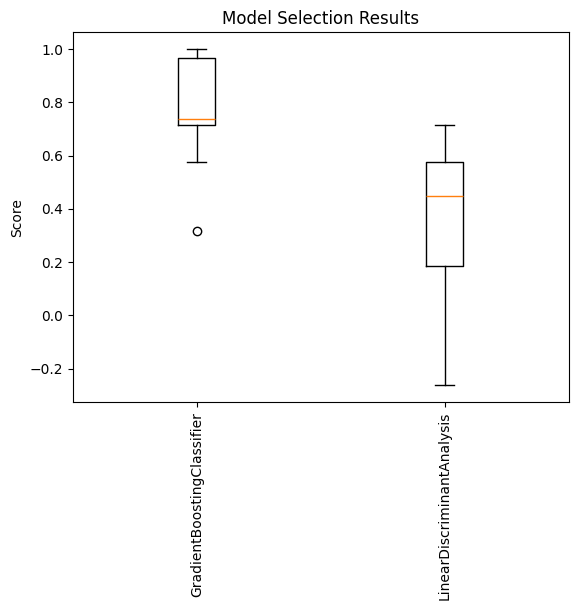

In [15]:
xg = [
    RandomForestClassifier(),
    XGBClassifier(),
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
]
res = mlpipe.model_selection(
    optimizer="bayesian_search",
    n_trials=2,
    n_runs=2,
    exclude=xg,
    n_iter=2,
    train_best="bayesian_search",
    verbose=False
)

The shap values do not exist for the label 0. The following is the summary plot for all the labels.


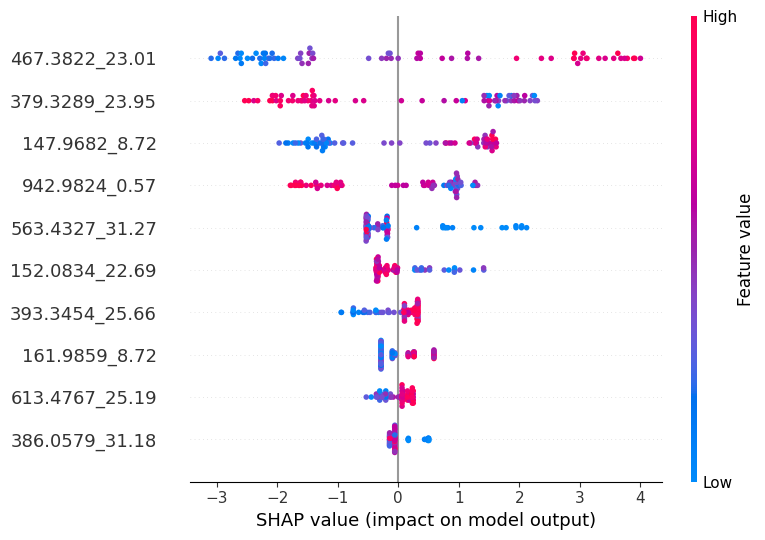

In [44]:
from machinelearning.mlexplain import FeaturesExplanation

explainer = FeaturesExplanation(estimator=mlpipe.best_estimator,
                                X=mlpipe.X,
                                y=mlpipe.y)

explainer.calculate_shap_values()
explainer.plot_shap_values()